# Assignment 2

In [2]:
using Distributions, Random, Plots

In [15]:
import Pkg
Pkg.add("SpecialFunctions")
using SpecialFunctions

   Resolving package versions...
  No Changes to `C:\Users\ashar\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\ashar\.julia\environments\v1.7\Manifest.toml`


## Question 2

In [16]:
function f_x(p)
    return (gamma((p/2)+1)/(π^(p/2)))
end

f_x (generic function with 1 method)

In [5]:
function circle_sampler()
    
    accept = 0
    counter = 0
    
    while accept == 0
        counter = counter + 1
        x= rand(Uniform(-1,1))
        y= rand(Uniform(-1,1))
        if x*x + y*y < 1 
            accept = 1
            return (x,y,counter)
        end
    end
end

circle_sampler (generic function with 1 method)

In [6]:
function sphere_sampler()
    
    accept = 0
    counter = 0
    
    while accept == 0
        counter = counter + 1
        x= rand(Uniform(-1,1))
        y= rand(Uniform(-1,1))
        z= rand(Uniform(-1,1))
        if x*x + y*y + z*z < 1 
            accept = 1
            return (x,y,z,counter)
        end
    end
end

sphere_sampler (generic function with 1 method)

In [7]:
function p_sampler(p)
    accept = 0
    counter = 0
    while accept == 0
        counter = counter + 1
        sum = 0
        for i in 0:p
            var_i = rand(Uniform(-1,1))
            
            sum = sum + var_i*var_i
        end
        if sum < 1 
            accept = 1 
            return counter
        end
    end
end

p_sampler (generic function with 1 method)

In [8]:
ar_1 = []
x_ar = []
y_ar = []
z_ar = []
count_3 = []
for i in 1:10000
    push!(ar_1 , sphere_sampler())
    push!(x_ar , ar_1[i][1])
    push!(y_ar , ar_1[i][2])
    push!(z_ar , ar_1[i][3])
    push!(count_3 , ar_1[i][4])
end

In [9]:
arr = []
x_arr = []
y_arr = []
counts = []
for i in 1:10000
    push!(arr , circle_sampler())
    push!(x_arr , arr[i][1])
    push!(y_arr , arr[i][2])
    push!(counts , arr[i][3])
end

In [21]:
count_4 = []
count_5 = []
for i in 1:10000
    push!(count_4 , p_sampler(4))
end
for i in 1:10000
    push!(count_5 , p_sampler(5))
end
println(length(counts))
println(length(count_3))
println(length(count_4))
println(length(count_5))

10000
10000
10000
10000


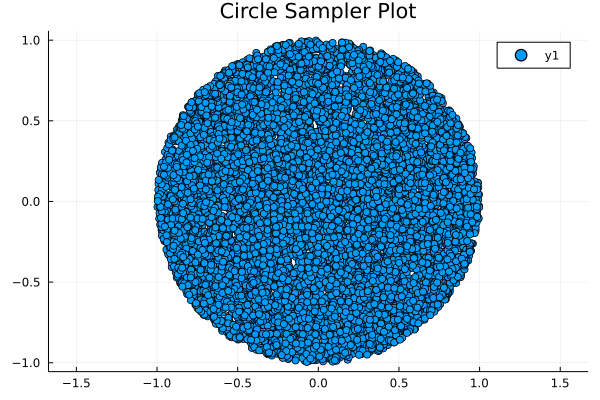

In [11]:
plot(x_arr,y_arr,seriestype = :scatter, title = "Circle Sampler Plot",aspect_ratio=:equal)

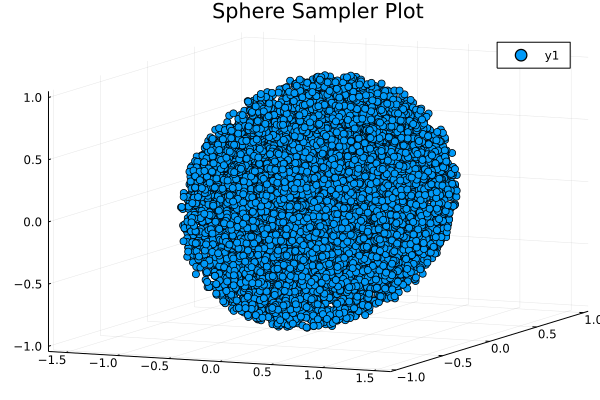

In [12]:
plot(x_ar,y_ar,z_ar,seriestype = :scatter, title = "Sphere Sampler Plot", aspect_ratio=1.0)

In [24]:
println("Iterations(c) for p=2 is   : " , (f_x(2))*4)
println("Mean Iterations for p=2 is : " , sum(counts)/10000)
println("Iterations(c) for p=3 is   : " , (f_x(3))*8)
println("Mean Iterations for p=3 is : " , sum(count_3)/10000)
println("Iterations(c) for p=4 is   : " , (f_x(4))*32)
println("Mean Iterations for p=4 is : " , sum(count_4)/10000)
println("Iterations(c) for p=5 is   : " , (f_x(5))*64)
println("Mean Iterations for p=5 is : " , sum(count_5)/10000)

Iterations(c) for p=2 is   : 1.2732395447351628
Mean Iterations for p=2 is : 1.277
Iterations(c) for p=3 is   : 1.909859317102744
Mean Iterations for p=3 is : 1.9338
Iterations(c) for p=4 is   : 6.484555753109618
Mean Iterations for p=4 is : 6.0738
Iterations(c) for p=5 is   : 12.158542037080533
Mean Iterations for p=5 is : 12.4494


On Increaing the value of p we see that the number of trials that are required increases.

## Question 3

In [25]:
function ar(a)
    accept = 0
    counter = 0
    while accept == 0
        counter = counter + 1
        u = rand(Normal(0,1))
        
        if u < a && u > -a
            accept = 1
            return (counter , u)
        end
    end
end

ar (generic function with 1 method)

In [26]:
function C_truncated(a)
    return  1/(cdf.(Normal(),a) - cdf.(Normal(),a*(-1)))
end

C_truncated (generic function with 1 method)

In [42]:
arr_1 = []
arr_4 = []
sample_1 = []
sample_4 = []
for i in 0:9999
    push!(arr_1 , ar(1)[1])
    push!(arr_4 , ar(4)[1])
    push!(sample_1 , ar(1)[2])
    push!(sample_4 , ar(4)[2])
end

In [43]:
c_1 = (C_truncated(1))
m_1 = sum(arr_1)/10000
err_1 = abs(m_1 - c_1)/c_1
c_4 = (C_truncated(4))
m_4 = sum(arr_4)/10000
err_4 = abs(m_4 - c_4)/c_4
println("Iterations(c) for a = 1 is    :" , c_1)
println("Mean Iterations for a = 1 is  :" , m_1)
println("Error for a = 1 is            :" , err_1*100)
println("Iterations(c) for a = 4 is    :" , c_4)
println("Mean Iterations for a = 4 is  :" , m_4)
println("Error for a = 4 is            :" , err_4*100)

Iterations(c) for a = 1 is    :1.4647947734915436
Mean Iterations for a = 1 is  :1.4579
Error for a = 1 is            :0.4706989413342185
Iterations(c) for a = 4 is    :1.0000633464961906
Mean Iterations for a = 4 is  :1.0001
Error for a = 4 is            :0.0036651182085469863


In [44]:
println("Calculated Variance for a = 1 is: ",var(sample_1))
println("Observed Variance for a = 1 is: ",var(TruncatedNormal(0, 1, -1, 1)))
println("Calculated Variance for a = 4 is: ",var(sample_4))
println("Observed Variance for a = 4 is: ",var(TruncatedNormal(0, 1, -4, 4)))

Calculated Variance for a = 1 is: 0.2932119435163515
Observed Variance for a = 1 is: 0.29112509477279314
Calculated Variance for a = 4 is: 1.005934119979665
Observed Variance for a = 4 is: 0.9989292903724738


In [45]:
println("Calculated Mean for a = 1 is: ",mean(sample_1))
println("Observed Mean for a = 1 is: ", mean(TruncatedNormal(0, 1, -1, 1)))
println("Calculated Mean for a = 4 is: ",mean(sample_4))
println("Observed Mean for a = 4 is: ",mean(TruncatedNormal(0, 1, -4, 4)))

Calculated Mean for a = 1 is: 0.002273442592529824
Observed Mean for a = 1 is: 0.0
Calculated Mean for a = 4 is: 0.00977211755198357
Observed Mean for a = 4 is: 0.0


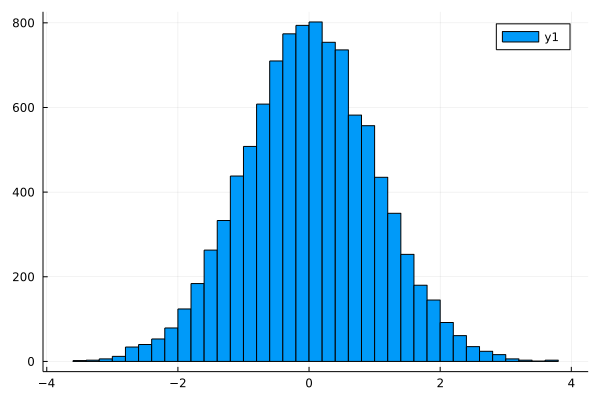

In [46]:
plot(histogram(sample_4))

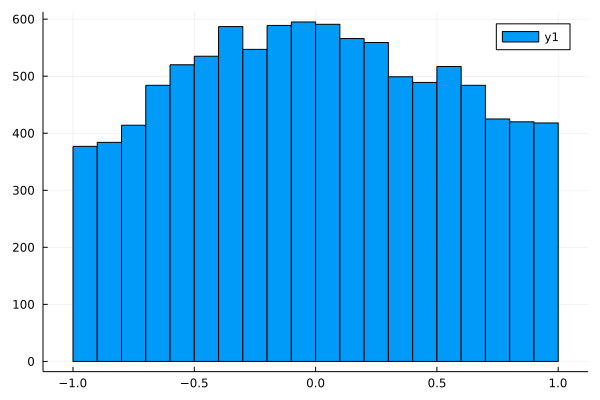

In [47]:
plot(histogram(sample_1))